# Tasks
- Check the accuracy of the sentiment determination (especially the negative sentiments)
- Removing the tweets from BSNL
- Sentiments targeted at in a tweet
- Sentiments over a period of time (day-wise for past 7 days)
- Think about presenting the sentiments (dashboard) - how to normalise the sentiments and represent them.
- Users must be able to enter their company name
- Could convert to a blog post

In [1]:
import pandas as pd
import sqlite3
import tweetnlp

2022-12-06 14:05:10.782228: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 14:05:11.074231: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-06 14:05:11.124306: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 14:05:11.124327: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
db_connection = sqlite3.connect("twitter.db")

tweet_df = pd.read_sql_query("SELECT * FROM tweet_table", db_connection)
user_df = pd.read_sql_query("SELECT * FROM users", db_connection)

In [13]:
official_author_ids = ['2251461926', "756759173979860992","756753726585593860","756765877522067460","714342951434866688","4074434776","756765832584294400","756757521117941760","2385010568","784328276709744641","3308588544","756764786264866816","756753110974988288","756763899685396480","609915498","217061741","758627856595517444","870478875695783936","756751043246100480","756753283004456960","3235739544","756756340240969728","2425380517","19405936","2383561627","756760385395515392","1315146123107991552","1281110078817333249","821956010440962048","758187181928132609","580660181","756764571201859584","249080727","755661458357321728","156528751","816162051403849728","756757973846884352","1298305980946497536","95637279","865900848412413952","745194026899431425","756077644689453056","829995501596532736","258688517","756767026727817216","959486392018636801","1571891644097761285","94040637","772736495199326208","2206571192","722390948051828737","841989411759779840","753174524783390720","2375216364","2278588848","2373263065","809413492230918144","758568353774514178","23174107","1325692170909614080","1075345755194433536","1933683168","837992104194236417","1154746406483234818","756759356738273280","756747539911704576","2401348694","2277766926","847045563342217216","756763170421760000","756046668089454592","563473154","1552548198425989120","841580472501129216","1508836842203930630","2363734664","2903261474","757957822495596544","1484487582","1191689604132290560","1483703168399974400","1332265592816975873","833646272","1148653231335071744","1415208154401443842","1637685056","875031853","60860965","2408527783","1370261674859458563","925740732119334913","2191972518","1518246693984096257","3059446292","84021710","1419179101215019009","845580374898085889","2397597488","1418859749777551364"]
tweet_df_filtered = tweet_df[tweet_df.author_id.isin(official_author_ids) == False]

In [15]:
model = tweetnlp.Sentiment()
model_xml = tweetnlp.load('sentiment_multilingual')

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

In [16]:
tweet_df_filtered.columns

Index(['tweet_id', 'author_id', 'created_at', 'reply_settings', 'tweet_text',
       'conversation_id', 'possibly_sensitive', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'lang', 'source', 'search_term'],
      dtype='object')

In [17]:
tweets = pd.DataFrame(tweet_df_filtered.tweet_text)

In [18]:
sentiments = []
probabilities = []
for tweet in tweet_df_filtered.tweet_text:
    prediction = model_xml.predict(tweet)
    sentiments.append(prediction['label'])
    probabilities.append(prediction['probability'])

In [23]:
tweet_df_filtered["sentiment"] = sentiments
tweet_df_filtered["probability"] = probabilities

/tmp/ipykernel_172385/2093296723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df_filtered["sentiment"] = sentiments
/tmp/ipykernel_172385/2093296723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df_filtered["probability"] = probabilities


In [25]:
tweet_df_filtered.columns

Index(['tweet_id', 'author_id', 'created_at', 'reply_settings', 'tweet_text',
       'conversation_id', 'possibly_sensitive', 'retweet_count', 'reply_count',
       'like_count', 'quote_count', 'lang', 'source', 'search_term',
       'sentiment', 'probability'],
      dtype='object')

In [165]:
tweets = tweet_df_filtered[['author_id', 'created_at', 'tweet_text', 'sentiment', 'probability', 'possibly_sensitive', 'retweet_count', 'reply_count', 'like_count', 'quote_count', 'lang', 'source']]

In [166]:
tweets['sentiment'] = tweets['sentiment'].map(
    {
        'negative': -1.0,
        'neutral': 0.0,
        'positive': 1.0
    }
)

/tmp/ipykernel_172385/456710863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['sentiment'] = tweets['sentiment'].map(


In [167]:
tweets['sentiment_score_1'] = tweets.sentiment * tweets.probability

/tmp/ipykernel_172385/1963274025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['sentiment_score_1'] = tweets.sentiment * tweets.probability


In [168]:
tweets['sentiment_score_2'] = tweets.sentiment * tweets.probability * (tweets.retweet_count + tweets.reply_count + tweets.like_count + tweets.quote_count + 1)

/tmp/ipykernel_172385/3407510477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['sentiment_score_2'] = tweets.sentiment * tweets.probability * (tweets.retweet_count + tweets.reply_count + tweets.like_count + tweets.quote_count + 1)


In [169]:
tweets

,author_id,created_at,tweet_text,sentiment,probability,possibly_sensitive,retweet_count,reply_count,like_count,quote_count,lang,source,sentiment_score_1,sentiment_score_2
0,2689302392,2022-11-29 15:30:15.000000,@BSNLCorporate Still Same Probleme Same Issue ...,-1.0,0.643080,0,0,0,0,0,und,Twitter Web App,-0.643080,-0.643080
1,1512423492247244805,2022-11-29 15:28:57.000000,RT @HasmukhSoni17: पिछले 5 साल से मेने @BSNL_G...,0.0,0.450583,0,13,0,0,0,hi,Twitter for Android,0.000000,0.000000
2,157669828,2022-11-29 15:27:35.000000,Bullshit Staff Behavior and Services in VI Sto...,-1.0,0.901995,0,0,0,0,0,en,Twitter for Android,-0.901995,-0.901995
3,1551559344176652290,2022-11-29 15:26:43.000000,@BSNL_KTK They are not receiving the call http...,0.0,0.522508,0,0,0,0,0,en,Twitter Web App,0.000000,0.000000
4,2689302392,2022-11-29 15:26:33.000000,@BSNLCorporate Still Same Probleme Same Issue ...,-1.0,0.643080,0,0,0,0,0,und,Twitter Web App,-0.643080,-0.643080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,1594994314106798080,2022-11-22 15:39:55.000000,@sachin_thulasi @MobiKwik @BSNL_KL @MobiKwikSW...,0.0,0.635090,0,0,1,0,0,en,Twitter for Android,0.000000,0.000000
4528,1489945316115709957,2022-11-22 15:37:18.000000,@MobiKwik @BSNL_KL @MobiKwikSWAT @BSNLCorporat...,-1.0,0.712029,0,0,2,0,1,en,Twitter Web App,-0.712029,-2.848116
4529,1577164460850036736,2022-11-22 15:36:32.000000,RT @maiamofficialna: பெரம்பூர் சட்டமன்ற தொகுதி...,0.0,0.775297,0,15,0,0,0,ta,Twitter for Android,0.000000,0.000000
4530,1577164460850036736,2022-11-22 15:36:28.000000,RT @MouryaMNM: Today visited BSNL abandoned qu...,-1.0,0.920869,0,140,0,0,0,en,Twitter for Android,-0.920869,-129.842570


In [170]:
x = tweets.set_index(pd.DatetimeIndex(tweets.created_at))

<AxesSubplot: xlabel='created_at'>

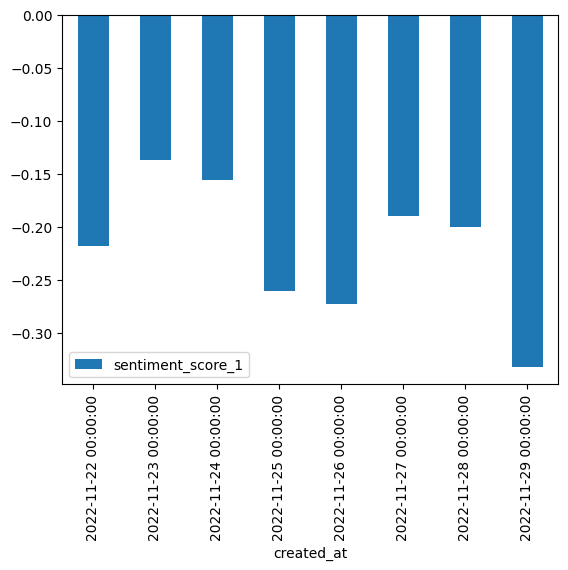

In [171]:
y = x.resample('D').mean('sentiment_score_1')
y.plot(kind='bar', y='sentiment_score_1')

<AxesSubplot: xlabel='created_at'>

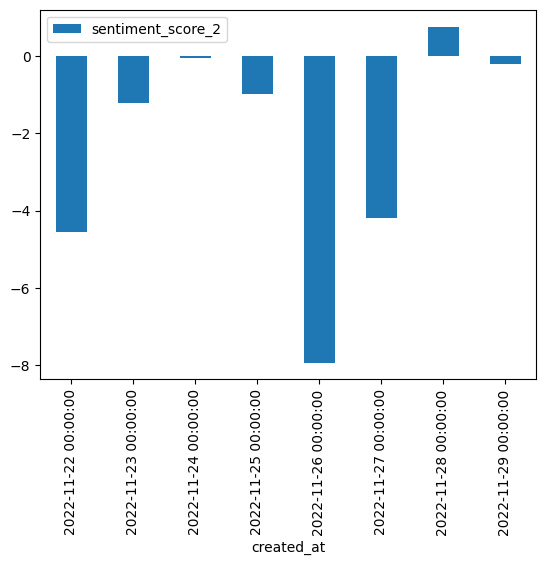

In [172]:
y = x.resample('D').mean('sentiment_score_2')
y.plot(kind='bar', y='sentiment_score_2')

In [173]:
y

,sentiment,probability,possibly_sensitive,retweet_count,reply_count,like_count,quote_count,sentiment_score_1,sentiment_score_2
created_at,,,,,,,,,
2022-11-22,-0.302139,0.627585,0.010695,12.943850,0.363636,0.877005,0.040107,-0.217973,-4.557165
2022-11-23,-0.188034,0.632534,0.001709,14.601709,0.353846,0.454701,0.030769,-0.137084,-1.219922
2022-11-24,-0.211610,0.619726,0.001873,5.653558,0.397004,0.636704,0.029963,-0.155892,-0.049514
2022-11-25,-0.367110,0.634567,0.001661,5.681063,0.475083,0.906977,0.018272,-0.261236,-0.968910
2022-11-26,-0.396739,0.630781,0.009058,16.449275,0.364130,0.521739,0.025362,-0.273181,-7.931592
2022-11-27,-0.290488,0.632709,0.010283,10.015424,0.367609,0.832905,0.017995,-0.190159,-4.193204
2022-11-28,-0.271335,0.642974,0.006565,11.927790,0.363239,0.890591,0.026258,-0.200458,0.770128
2022-11-29,-0.455243,0.640802,0.005115,4.191816,0.184143,0.340153,0.015345,-0.332304,-0.200352
